<a href="https://colab.research.google.com/github/shikha-2011/Time-Series/blob/main/TimeSeries_Analysis_using_Kats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kats

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('/content/Aquifer_Petrignano.csv')
df.head()
df.columns = ['time',	'rainfall',	'gdepth_p24',	'gdepth_p25',	
              'temp_bastia',	'temp_petri',	'volume', 'hydromtery']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4103 entries, 0 to 4102
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         4103 non-null   object 
 1   rainfall     4103 non-null   float64
 2   gdepth_p24   4064 non-null   float64
 3   gdepth_p25   4076 non-null   float64
 4   temp_bastia  4103 non-null   float64
 5   temp_petri   4103 non-null   float64
 6   volume       4102 non-null   float64
 7   hydromtery   4103 non-null   float64
dtypes: float64(7), object(1)
memory usage: 256.6+ KB


In [32]:
df.isnull().sum()

time            0
rainfall        0
gdepth_p24     39
gdepth_p25     27
temp_bastia     0
temp_petri      0
volume          1
hydromtery      0
dtype: int64

In [33]:
df['gdepth_p24'] = df['gdepth_p24'].interpolate()
df['gdepth_p25'] = df['gdepth_p25'].interpolate()
df['volume'] = df['volume'].interpolate()


In [34]:
df.isnull().sum()

time           0
rainfall       0
gdepth_p24     0
gdepth_p25     0
temp_bastia    0
temp_petri     0
volume         0
hydromtery     0
dtype: int64

In [35]:
df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time')

In [7]:
df.head()

,rainfall,gdepth_p24,gdepth_p25,temp_bastia,temp_petri,volume,hydromtery
time,,,,,,,
2009-07-04,0.0,-28.43,-27.97,14.1,13.3,-28618.272,2.5
2009-08-04,0.0,-28.47,-27.98,14.5,13.4,-30295.296,2.5
2009-09-04,0.2,-28.46,-27.97,14.3,13.9,-30932.928,2.4
2009-10-04,0.0,-28.41,-27.90,14.3,13.8,-29541.888,2.4
2009-11-04,0.0,-28.33,-27.86,14.4,13.6,-28015.200,2.4


In [36]:
target1 = df['gdepth_p24'].to_frame()

In [37]:
train = int(0.9 * len(target1))
train

3692

In [38]:
train_1 = target1[:train]
test_1 = target1[train:]
print(len(train_1), len(test_1))

3692 411


### Converting `pandas.DataFrame` to `TimeSeries` object

In [39]:
from kats.consts import TimeSeriesData

In [40]:
ts_1 = TimeSeriesData(train_1.reset_index(), time_col_name="time")
print(type(ts_1))

<class 'kats.consts.TimeSeriesData'>


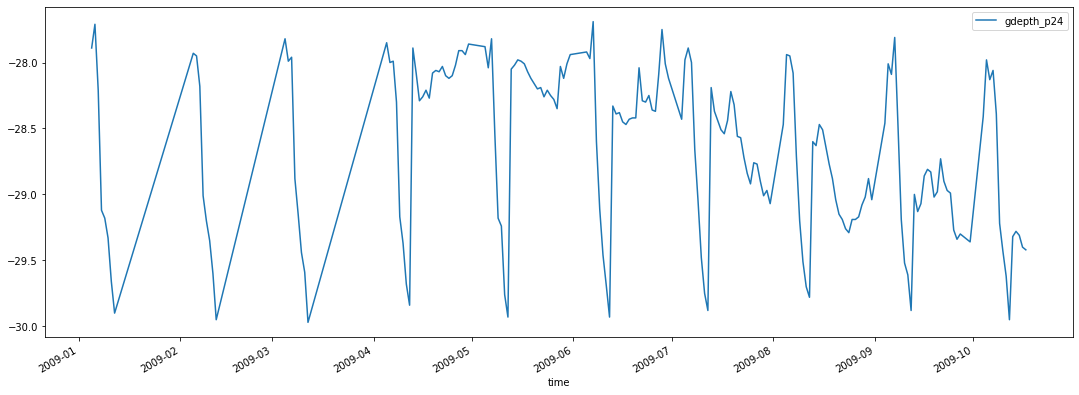

In [52]:
ts_1[:200].plot(cols=['gdepth_p24'],grid=True,figsize=(15,6))

### Forecasting Using Prophet


In [42]:
from kats.models.prophet import ProphetModel
from kats.models.prophet import ProphetParams

In [49]:
# Specify parameters
params = ProphetParams(seasonality_mode="multiplicative")

# Create a model instance
model = ProphetModel(ts_1, params)

# Fit mode
model.fit()

# Forecast
fcst = model.predict(steps=30, freq="MS")
fcst

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,time,fcst,fcst_lower,fcst_upper
0,2020-01-01,-26.750581,-28.498897,-25.078208
1,2020-02-01,-26.722803,-28.320015,-25.046029
2,2020-03-01,-26.409460,-27.964837,-24.608103
3,2020-04-01,-26.186674,-27.904243,-24.429963
4,2020-05-01,-25.947851,-27.752522,-24.036981
5,2020-06-01,-25.846834,-27.527788,-23.904172
6,2020-07-01,-26.107368,-28.110451,-24.057964
7,2020-08-01,-26.666574,-28.728356,-24.348755
8,2020-09-01,-27.102532,-29.512750,-24.466671
9,2020-10-01,-27.285194,-29.746331,-24.647138


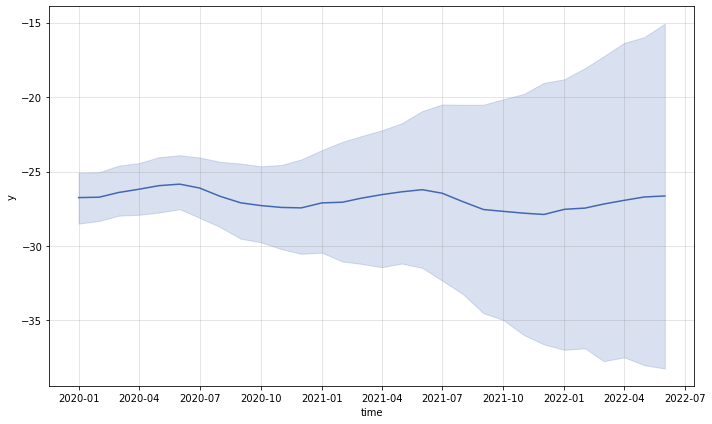

In [50]:
model.plot()

In [54]:
test_1.index[:30]

DatetimeIndex(['2019-05-17', '2019-05-18', '2019-05-19', '2019-05-20',
               '2019-05-21', '2019-05-22', '2019-05-23', '2019-05-24',
               '2019-05-25', '2019-05-26', '2019-05-27', '2019-05-28',
               '2019-05-29', '2019-05-30', '2019-05-31', '2019-01-06',
               '2019-02-06', '2019-03-06', '2019-04-06', '2019-05-06',
               '2019-06-06', '2019-07-06', '2019-08-06', '2019-09-06',
               '2019-10-06', '2019-11-06', '2019-12-06', '2019-06-13',
               '2019-06-14', '2019-06-15'],
              dtype='datetime64[ns]', name='time', freq=None)

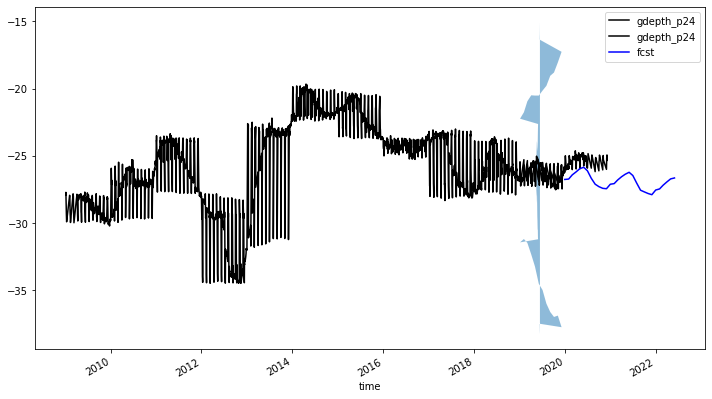

In [59]:
fig, ax = plt.subplots(figsize=(12, 7))

train_1.plot(ax=ax, label="train", color="black")
test_1.plot(ax=ax, color="black")
fcst.plot(x="time", y="fcst", ax=ax, color="blue")

ax.fill_between(test_1.index[:30], fcst["fcst_lower"], fcst["fcst_upper"], alpha=0.5)
ax.get_legend()

## Detecting Outliers using Kats

1. We can detect the same using `from kats.detectors.outlier import OutlierDetector`





In [70]:
df.head()
df=df.reset_index()

In [71]:
df['time'] = pd.to_datetime(df['time'],format='%d/%m/%Y')


Text(0.5, 1.0, 'volume')

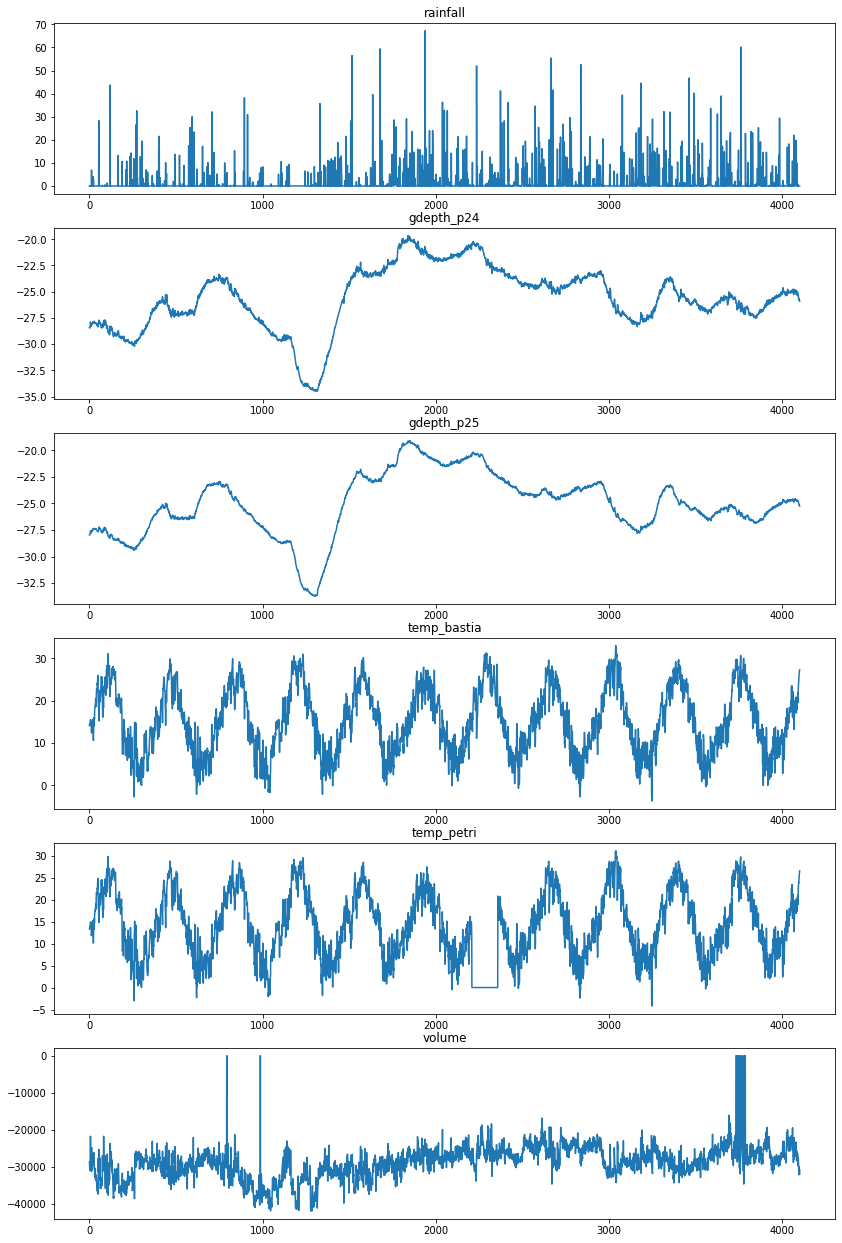

In [81]:
fig, axes = plt.subplots(6,1, figsize=(14,22))

axes[0].plot(df['rainfall'])
axes[0].set_title ('rainfall')
axes[1].plot(df['gdepth_p24'])
axes[1].set_title ('gdepth_p24')
axes[2].plot(df['gdepth_p25'])
axes[2].set_title ('gdepth_p25')
axes[3].plot(df['temp_bastia'])
axes[3].set_title ('temp_bastia')
axes[4].plot(df['temp_petri'])
axes[4].set_title ('temp_petri')
axes[5].plot(df['volume'])
axes[5].set_title ('volume')


In [83]:
ts_temp = TimeSeriesData(df[['time','temp_petri']], time_col_name='time')


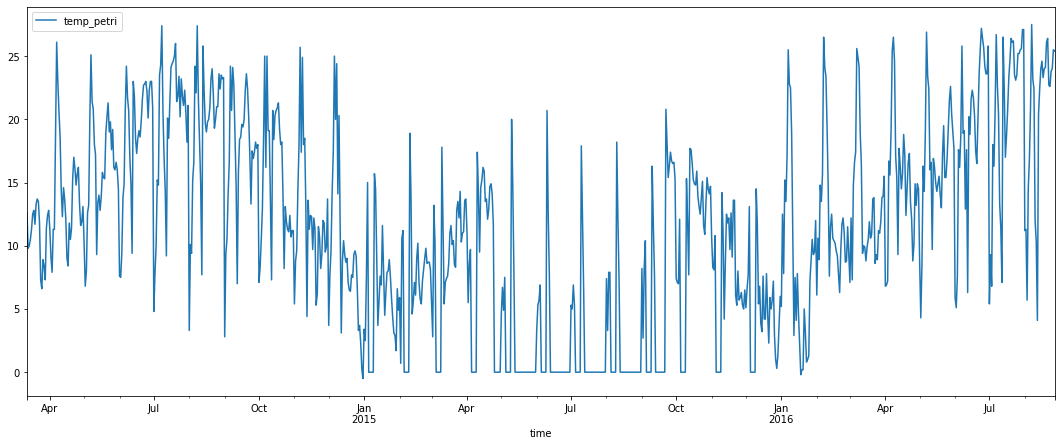

In [84]:
ts_temp[1800:2700].plot(cols=['temp_petri'],grid=True,figsize=(15,6))

In [ ]:
from kats.detectors.outlier import OutlierDetector

#get hydrometry data
#ts_1 = TimeSeriesData(train_1.reset_index(), time_col_name="time")

#ts_gdepthp24 = TimeSeriesData(df[['time','gdepth_p24']], time_col_name='time')
ts_volume = TimeSeriesData(df[['time','volume']], time_col_name='time')
#ts_temp = TimeSeriesData(df[['time','temp_petri']], time_col_name='time')

# Detect outliers
ts_outlierDetection = OutlierDetector(ts_volume, "additive")
ts_outlierDetection.detector()

# Print outliers
outlier_range1 = ts_outlierDetection.outliers[0]
outlier_range1

In [93]:
len(outlier_range1)

47

In [101]:
outlier_range1[11:]

[Timestamp('2019-01-08 00:00:00'),
 Timestamp('2019-02-07 00:00:00'),
 Timestamp('2019-02-08 00:00:00'),
 Timestamp('2019-02-09 00:00:00'),
 Timestamp('2019-02-10 00:00:00'),
 Timestamp('2019-03-07 00:00:00'),
 Timestamp('2019-03-08 00:00:00'),
 Timestamp('2019-03-09 00:00:00'),
 Timestamp('2019-04-06 00:00:00'),
 Timestamp('2019-04-07 00:00:00'),
 Timestamp('2019-04-08 00:00:00'),
 Timestamp('2019-04-09 00:00:00'),
 Timestamp('2019-05-07 00:00:00'),
 Timestamp('2019-05-08 00:00:00'),
 Timestamp('2019-05-09 00:00:00'),
 Timestamp('2019-05-10 00:00:00'),
 Timestamp('2019-06-26 00:00:00'),
 Timestamp('2019-06-27 00:00:00'),
 Timestamp('2019-06-28 00:00:00'),
 Timestamp('2019-06-29 00:00:00'),
 Timestamp('2019-06-30 00:00:00'),
 Timestamp('2019-07-01 00:00:00'),
 Timestamp('2019-07-14 00:00:00'),
 Timestamp('2019-07-21 00:00:00'),
 Timestamp('2019-08-13 00:00:00'),
 Timestamp('2019-08-14 00:00:00'),
 Timestamp('2019-08-15 00:00:00'),
 Timestamp('2019-08-16 00:00:00'),
 Timestamp('2019-08-

Here most of the outliers can be seen in the year **2019**. 
And those value to volumes near to **0 cubic units**.

In [100]:
# shows the outliers from the dataframe in highlights 
df_volume = df[['time', 'volume']]
df_volume[3700:4000].style.highlight_max(axis=0)


,time,volume
3700,2019-05-25 00:00:00,-22049.280000
3701,2019-05-26 00:00:00,-18142.272000
3702,2019-05-27 00:00:00,-18876.672000
3703,2019-05-28 00:00:00,-21126.528000
3704,2019-05-29 00:00:00,-21195.648000
3705,2019-05-30 00:00:00,-20933.856000
3706,2019-05-31 00:00:00,-22206.528000
3707,2019-01-06 00:00:00,-23565.600000
3708,2019-02-06 00:00:00,-21966.336000
3709,2019-03-06 00:00:00,-23765.184000


**Time Series Features**
1. Kats allows you to find out important information about time series features with `TsFeatures`.

2. Shows statistics such as linearity, trend strength, seasonality strength, seasonality parameters, etc.

In [87]:
ts_1

,time,gdepth_p24
0,2009-01-05,-27.89
1,2009-01-06,-27.71
2,2009-01-07,-28.21
3,2009-01-08,-29.12
4,2009-01-09,-29.18
...,...,...
3687,2019-12-01,-26.94
3688,2019-12-02,-26.48
3689,2019-12-03,-26.15
3690,2019-12-04,-25.70


In [86]:
from kats.tsfeatures.tsfeatures import TsFeatures

model = TsFeatures()

output_features = model.transform(ts_1)
output_features

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




{'binarize_mean': 0.5246478873239436,
 'crossing_points': 134,
 'diff1y_acf1': 0.05792061984694595,
 'diff1y_acf5': 0.038423381043072635,
 'diff1y_pacf5': 0.035715701164607455,
 'diff2y_acf1': -0.4541350000042401,
 'diff2y_acf5': 0.20778008384553426,
 'diff2y_pacf5': 0.3832226662450934,
 'entropy': 0.34503793991300985,
 'firstmin_ac': 22,
 'firstzero_ac': 483,
 'flat_spots': 4,
 'heterogeneity': 3448.6159026898918,
 'histogram_mode': -24.103,
 'holt_alpha': 0.9999999849157817,
 'holt_beta': 3.5020283349067074e-14,
 'hurst': 0.08090029865583542,
 'hw_alpha': nan,
 'hw_beta': nan,
 'hw_gamma': nan,
 'length': 3692,
 'level_shift_idx': 1351,
 'level_shift_size': 0.5089999999999968,
 'linearity': 0.11821095456052963,
 'lumpiness': 3.3557608464086246,
 'mean': -25.584164409534157,
 'peak': 2,
 'seas_acf1': 0.8288171439801918,
 'seas_pacf1': 0.11015174808720136,
 'seasonality_strength': 0.2883971154436996,
 'spikiness': 7.390097450815607e-08,
 'stability': 8.553510025396637,
 'std1st_der': 0

### Trend Change Detection
1. It is also possible to detect the trend direction of a series with Kats
2. Kats uses the `from kats.detectors.trend_mk import MKDetector`


In [102]:
from kats.detectors.trend_mk import MKDetector

In [103]:
detector = MKDetector(data=ts_1, threshold=.8)


In [106]:
detected_time_points = detector.detector(direction='down', window_size=10)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning:

After 0.13 initialization must be handled at model creation



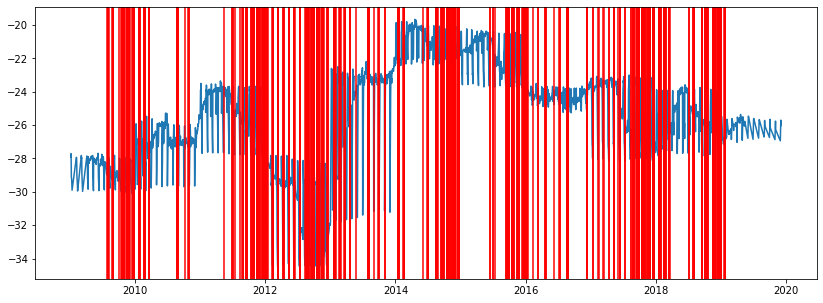

In [107]:
detector.plot(detected_time_points)
plt.show()

### Multitvariate analysis using VAR

Kats uses `from kats.models.var import VARModel, VARParams
` for multivariate analysis

In [109]:
df.head()

,time,rainfall,gdepth_p24,gdepth_p25,temp_bastia,temp_petri,volume,hydromtery
0,2009-07-04,0.0,-28.43,-27.97,14.1,13.3,-28618.272,2.5
1,2009-08-04,0.0,-28.47,-27.98,14.5,13.4,-30295.296,2.5
2,2009-09-04,0.2,-28.46,-27.97,14.3,13.9,-30932.928,2.4
3,2009-10-04,0.0,-28.41,-27.90,14.3,13.8,-29541.888,2.4
4,2009-11-04,0.0,-28.33,-27.86,14.4,13.6,-28015.200,2.4


In [108]:
from kats.models.var import VARModel, VARParams


In [110]:
multi_ts = TimeSeriesData(df, time_col_name='time') # son 3 ay test verisi


In [111]:
multi_ts[:10]


,time,rainfall,gdepth_p24,gdepth_p25,temp_bastia,temp_petri,volume,hydromtery
0,2009-01-05,0.0,-27.89,-27.39,14.3,13.7,-27604.800,2.3
1,2009-01-06,0.0,-27.71,-27.21,15.2,14.8,-25255.584,2.1
2,2009-01-07,0.0,-28.21,-27.50,23.4,22.9,-30447.360,2.1
3,2009-01-08,0.0,-29.12,-28.30,28.0,26.5,-33610.464,2.0
4,2009-01-09,0.0,-29.18,-28.42,26.1,25.6,-36434.880,2.0
5,2009-01-10,0.0,-29.33,-28.61,19.0,18.0,-36187.776,1.9
6,2009-01-11,0.0,-29.66,-28.98,7.5,7.1,-34892.640,2.0
7,2009-01-12,0.0,-29.90,-29.14,8.9,8.8,-33773.760,2.3
8,2009-02-05,0.0,-27.93,-27.42,15.9,15.6,-29345.760,2.3
9,2009-02-06,0.0,-27.95,-27.28,16.6,16.1,-31354.560,2.1


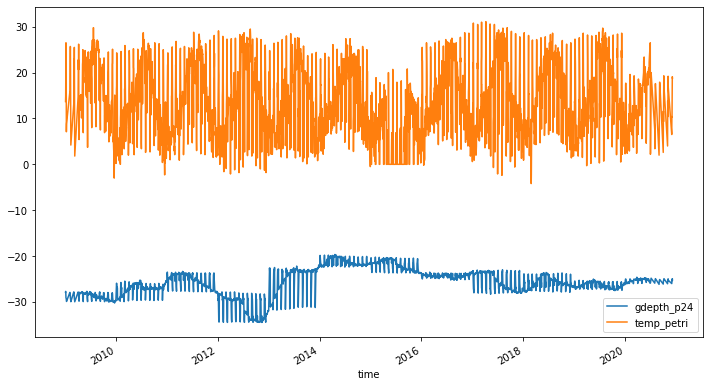

In [114]:
multi_ts.plot(cols=['gdepth_p24',	'temp_petri'])


In [115]:
params = VARParams()
m = VARModel(multi_ts, params)
m.fit()

In [116]:
fcst = m.predict(steps=30)


/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:34: FutureWarning:

y is a deprecated alias for endog, will be removed in version 0.11.0



In [118]:
fcst['gdepth_p24']

,time,fcst,fcst_lower,fcst_upper
0,2020-12-07,-25.481133,-26.675210,-24.287057
1,2020-12-08,-25.852891,-27.317352,-24.388429
2,2020-12-09,-25.556665,-27.126913,-23.986418
3,2020-12-10,-25.350413,-26.964672,-23.736154
4,2020-12-11,-25.302698,-26.943959,-23.661437
5,2020-12-12,-25.081628,-26.732983,-23.430273
6,2020-12-13,-25.235865,-26.889052,-23.582678
7,2020-12-14,-25.488330,-27.143894,-23.832766
8,2020-12-15,-25.438427,-27.096428,-23.780427
9,2020-12-16,-25.286700,-26.945947,-23.627453


In [119]:
fcst['gdepth_p25']

,time,fcst,fcst_lower,fcst_upper
0,2020-12-07,-25.147535,-26.277599,-24.017470
1,2020-12-08,-25.474933,-26.872466,-24.077399
2,2020-12-09,-25.245336,-26.747940,-23.742733
3,2020-12-10,-25.054912,-26.600835,-23.508989
4,2020-12-11,-24.996136,-26.564731,-23.427541
5,2020-12-12,-24.752161,-26.330869,-23.173452
6,2020-12-13,-24.917415,-26.498071,-23.336760
7,2020-12-14,-25.154188,-26.737087,-23.571288
8,2020-12-15,-25.125681,-26.710455,-23.540908
9,2020-12-16,-24.971987,-26.557961,-23.386013


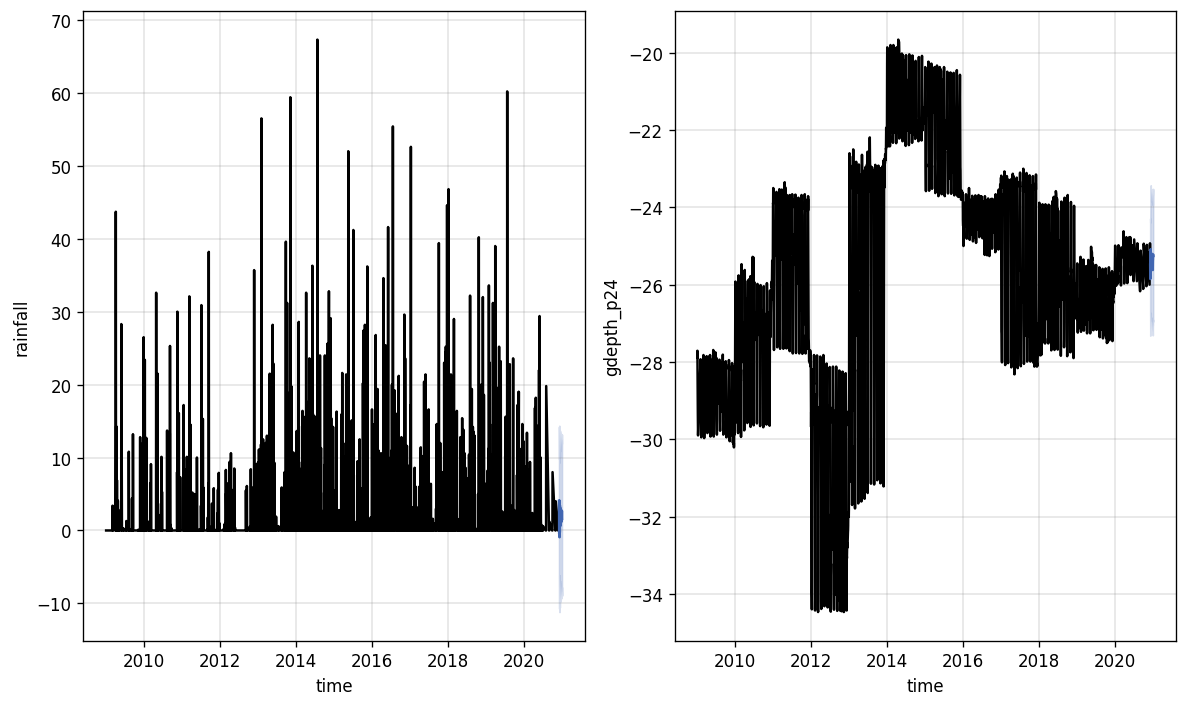

In [120]:
m.plot()
plt.show()

### References
1. https://analyticsindiamag.com/a-guide-to-kats-python-tool-by-meta-for-effective-time-series-analysis/
2. https://towardsdatascience.com/kats-a-generalizable-framework-to-analyze-time-series-data-in-python-3c8d21efe057
3. https://www.kaggle.com/code/recepyilkici/time-series-analysis-and-forecasting-with-kats
4. https://facebookresearch.github.io/Kats/api/
